In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as p

In [3]:
df = pd.read_csv("tes_full - Copy.csv").iloc[:, 1:]

In [4]:
label_df = pd.read_csv("merchants_cleaned.csv")[['merchant_name', 'website', 'label']]
label_df.head()

,merchant_name,website,label
0,CV.ASIATRIPINDONESIA,http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,http://www.matair.co.id,APPROVED
4,SimplyMii,https://www.simplymii.com/,APPROVED


In [5]:
join_df = df.merge(label_df, on=['merchant_name','website'])
join_df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,links_response,website,fraud_score,label
0,CV.ASIATRIPINDONESIA,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{'https://asiatrip.id/reseller/': '<Response [...,http://asiatrip.id/,0.000000,APPROVED
1,Pt.BloomingLotusYoga,70.000000,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{'http://www.blooming-lotus-yoga.com/bliss-mag...,https://www.blooming-lotus-yoga.com,0.000000,APPROVED
2,YayasanGreenSejahtera,11.111111,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,"{'': 'No Response/Timeout', 'https://greenseja...",https://greensejahterafoundation.com/,0.000000,APPROVED
3,PTMatairTerraSolusi,12.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"{'': 'No Response/Timeout', 'https://www.matai...",http://www.matair.co.id,0.666667,APPROVED
4,SimplyMii,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,100.0,0.0,{'https://www.simplymii.com/products/category/...,https://www.simplymii.com/,0.000000,APPROVED


In [6]:
join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)].shape[0]/\
join_df[(join_df.label == 'REJECTED')].shape[0]

0.3584905660377358

In [7]:
join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("contact_us_score").size()

contact_us_score
0.000000       6
33.333333      6
66.666667      9
100.000000    17
dtype: int64

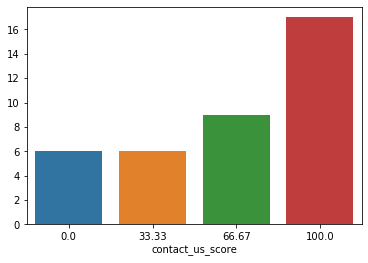

In [8]:
sns.barplot(x=np.round(join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("contact_us_score").size().index, 2),\
        y=join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("contact_us_score").size().values)

In [9]:
join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("tnc_score").size()

tnc_score
0.0       8
50.0     12
100.0    18
dtype: int64

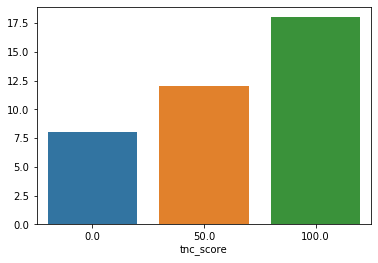

In [10]:
sns.barplot(x=np.round(join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("tnc_score").size().index, 2),\
        y=join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("tnc_score").size().values)

In [11]:
join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100)]\
.groupby("link_about_us_exist").size()

link_about_us_exist
0.0    19
1.0    19
dtype: int64

In [12]:
modelfile = '../models/final_prediction.pickle'
model = p.load(open(modelfile, 'rb'))

In [13]:
test = join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100) & (join_df.fraud_score < 0.5)]

In [14]:
test = test.iloc[:,1:10].values.tolist()

In [15]:
new_fraud_score = model.predict_proba(test)[:,1]

TypeError: Input data can not be a list.

In [ ]:
retest_df = join_df[(join_df.label == 'REJECTED') & (join_df.broken_link_score < 100) & (join_df.fraud_score < 0.5)]\
[['website', 'cu_email_exist', 'cu_phone_number_exist', 'tnc_refund_policy_exist']]

In [ ]:
retest_df['new_fraud_score'] = new_fraud_score

In [ ]:
retest_df[retest_df.new_fraud_score == 0].shape

In [ ]:
pd.read_csv("tes_reviewed.csv")

In [16]:
pd.read_csv("tes_reviewed.csv")[['merchant_name', 'website', 'fraud_score']]

,merchant_name,website,fraud_score
0,freakythrifting,https://www.instagram.com/freakythriftshop_/?h...,0.491156
1,DecoPerfect,https://decoperfect.com,0.000226
